In [136]:
import sys
for p in ['..']:
  if p not in sys.path:
    sys.path.insert(0, p)

from collections import namedtuple
import os
import pickle
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML, display
import skimage.color
import skimage.transform

from digits.data import Env, Loader
from digits.explore import img_tag

%matplotlib inline

env = Env('..')
env.assert_ready()
loader = Loader.from_env(env)
loader.assert_ready()
print("ready")

ready


In [2]:
orig, proc = loader.load_data('crop-test-small', 42)

In [3]:
proc.X.shape

(100, 32, 32, 3)

In [4]:
def img_show(img):
    return HTML(img_tag(img))


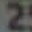

In [5]:
img_show(proc.X[0])

In [41]:
def mk_int(X):
    return np.clip(np.round(255*X), 0, 255).astype(np.uint8)
def mk_gray(X):
    return mk_int(skimage.color.rgb2gray(X))

In [42]:
g = mk_gray(proc.X[0])


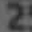

In [68]:
img_show(g)

In [97]:
from skimage.transform import SimilarityTransform
)
h = mk_int()

In [98]:
h.shape

(32, 32)

In [137]:
def rando(img):
    s = 1.05
    r = 0.1
    t = 2.0
    scale = random.uniform(1/s, s)
    rot = random.uniform(-r, r)
    trans = (random.uniform(-t, t), random.uniform(-t, t))
    tform = SimilarityTransform(scale=scale, rotation=rot, translation=trans)
    return mk_int(skimage.transform.warp(g, tform, mode='symmetric'))


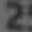

In [147]:
img_show(rando(g))